In [1]:
from bluepy.v2 import Simulation

import efel

from bluepy.v2 import Circuit
from bluepy.v2 import Cell
from bluepy.v2.enums import Synapse

from os import path

import pandas as pd

import numpy as np
from matplotlib import pyplot as plt
import pickle


In [2]:
c = Circuit('/gpfs/bbp.cscs.ch/project/proj64/circuits/O1.v6a/20181207/CircuitConfig')

In [ ]:
onepercent_gids = np.loadtxt("/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/mc2_onepercent_allLayers_EXCandINH_gids.txt")
onepercent_gids_str = [str(int(i)) for i in onepercent_gids]

In [3]:
L5_mc2 = c.cells.get({'$target': 'mc2_Column', Cell.LAYER: 5})
print(L5_mc2['morph_class'].unique())

L5_mc2[L5_mc2['morph_class']=="INT"]['mtype'].unique()

L5mc2_TPC_A = L5_mc2[L5_mc2['mtype']=='L5_TPC:A'].index.tolist()
L5mc2_TPC_Astr = [str(i) for i in L5mc2_TPC_A]

L5mc2_MC = L5_mc2[L5_mc2['mtype']=='L5_MC'].index.tolist()
L5mc2_MCstr = [str(i) for i in L5mc2_MC]


[INT, PYR]
Categories (2, object): [INT, PYR]


In [4]:
# full met thalam stim
sim = Simulation('/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/met_v3_all_23nov2020/BlueConfig')


Have keys ({'FlushBufferScalar'}) that are not defined for section: Run


In [ ]:
# soma recordings are too heavy and crash jupyter. Use pure h5 or use it from script (for example, see /gpfs/bbp.cscs.ch/project/proj34/metabolismndam/utils/getMeanFreq.py)
 
#report = sim.report('soma', source='h5')
#vmv = report.get()

In [5]:
report = sim.report('NaConcAllCmps', source='h5')
nai = report.get()
nai = nai.reset_index()

report = sim.report('KConcAllCmps', source='h5')
ki = report.get()
ki = ki.reset_index()

report = sim.report('CaConcAllCmps', source='h5')
cai = report.get()
cai = cai.reset_index()

report = sim.report('ATPConcAllCmps', source='h5')
atp = report.get()
atp = atp.reset_index()

report = sim.report('ADPConcAllCmps', source='h5')
adp = report.get()
adp = adp.reset_index()

Ignoring unknown key: 'FlushBufferScalar'
`brain` module not found. Using experimental fallback implementation for H5 report access.
Ignoring unknown key: 'FlushBufferScalar'
`brain` module not found. Using experimental fallback implementation for H5 report access.
Ignoring unknown key: 'FlushBufferScalar'
`brain` module not found. Using experimental fallback implementation for H5 report access.
Ignoring unknown key: 'FlushBufferScalar'
`brain` module not found. Using experimental fallback implementation for H5 report access.
Ignoring unknown key: 'FlushBufferScalar'
`brain` module not found. Using experimental fallback implementation for H5 report access.


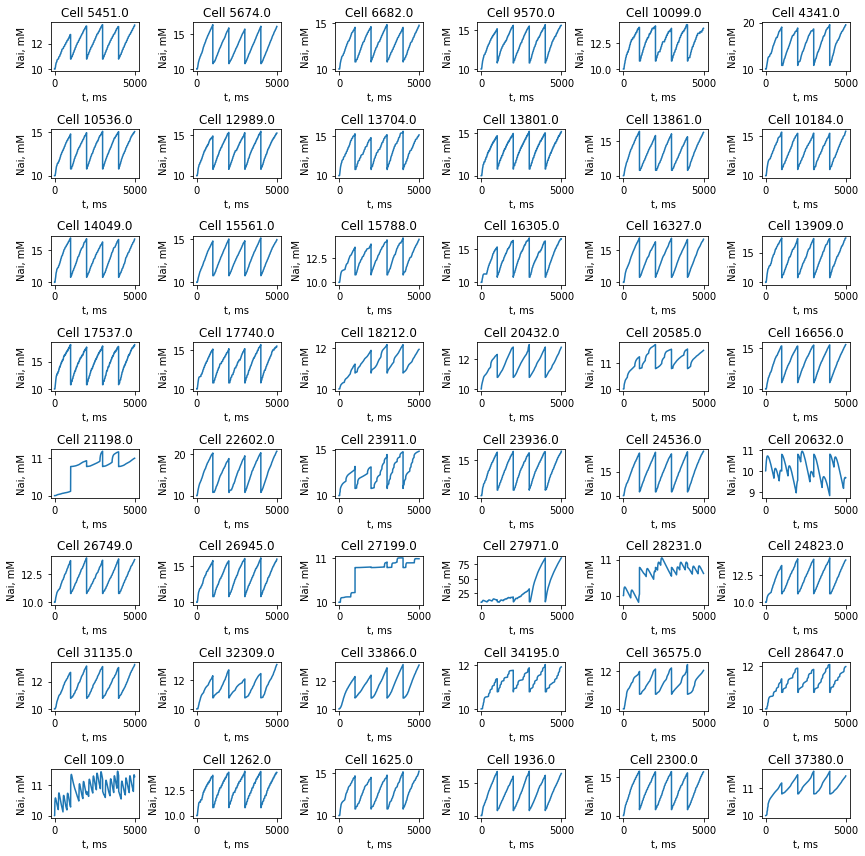

In [5]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(nai.loc[:,["time"] + onepercent_gids.tolist()[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(nai['time'],nai[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='Nai, mM')

fig.tight_layout()

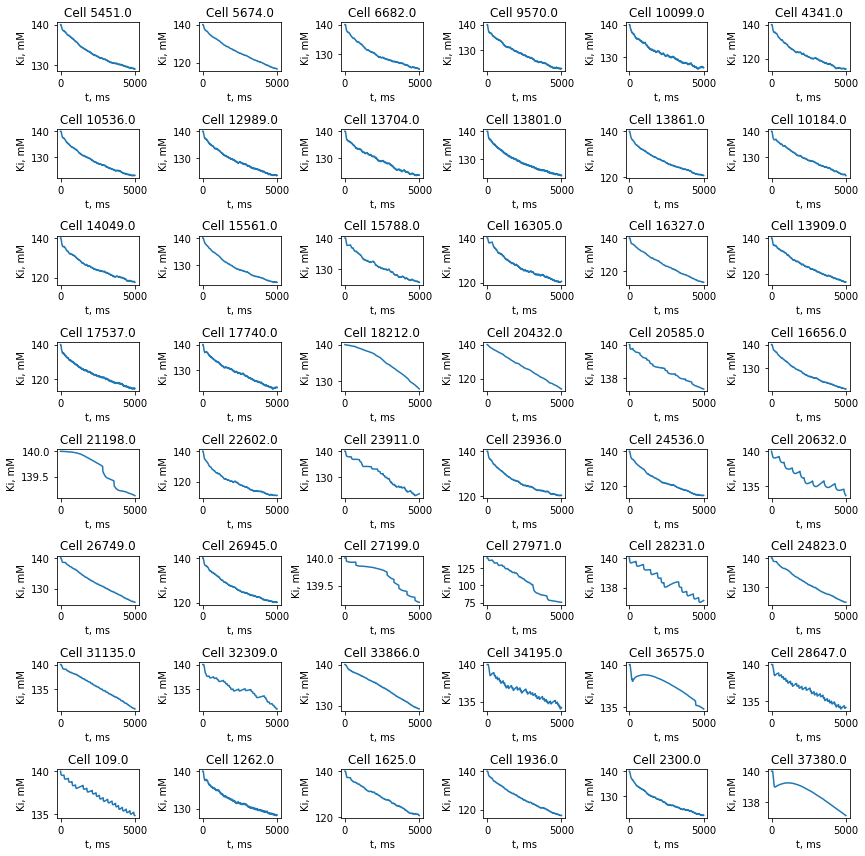

In [6]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(ki.loc[:,["time"] + onepercent_gids.tolist()[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(ki['time'],ki[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='Ki, mM')

fig.tight_layout()

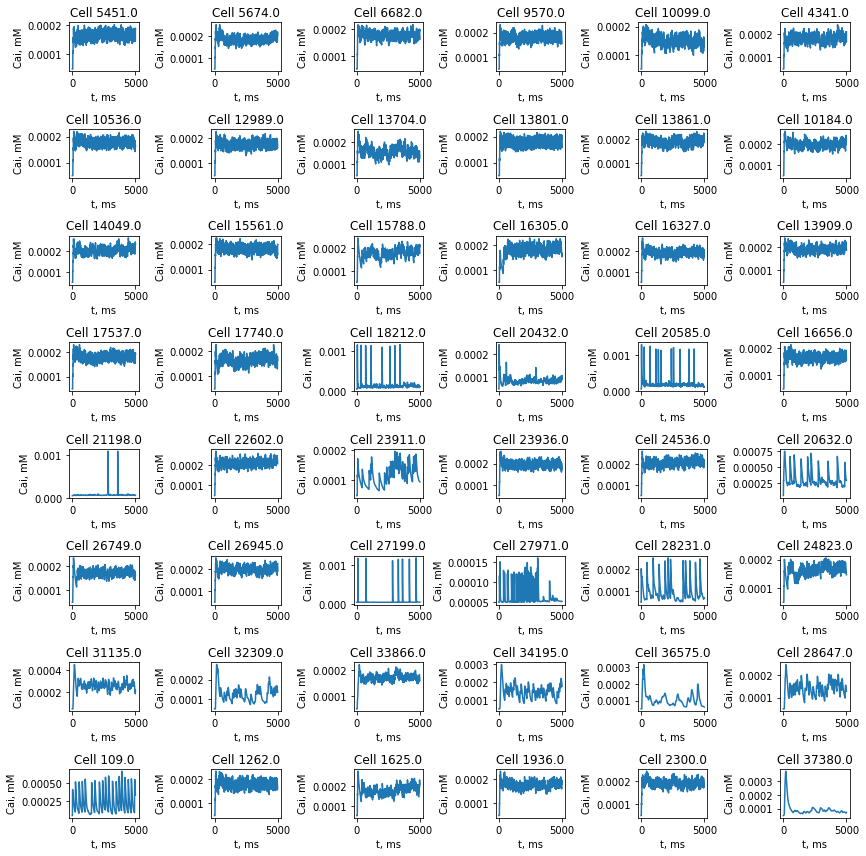

In [7]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(cai.loc[:,["time"] + onepercent_gids.tolist()[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(cai['time'],cai[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='Cai, mM')

fig.tight_layout()

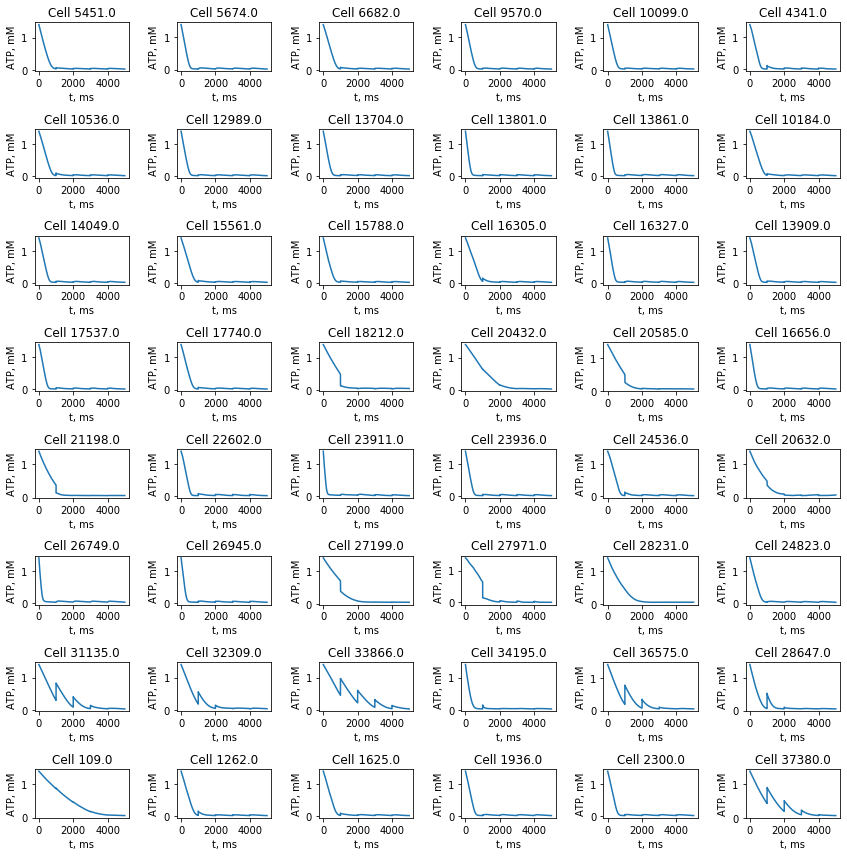

In [25]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(atp.loc[:,["time"] + onepercent_gids.tolist()[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(atp['time'],atp[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='ATP, mM')

fig.tight_layout()

#plt.savefig('/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/met_v3_all_23nov2020/plot_atp_onePercentCellsShown.png')


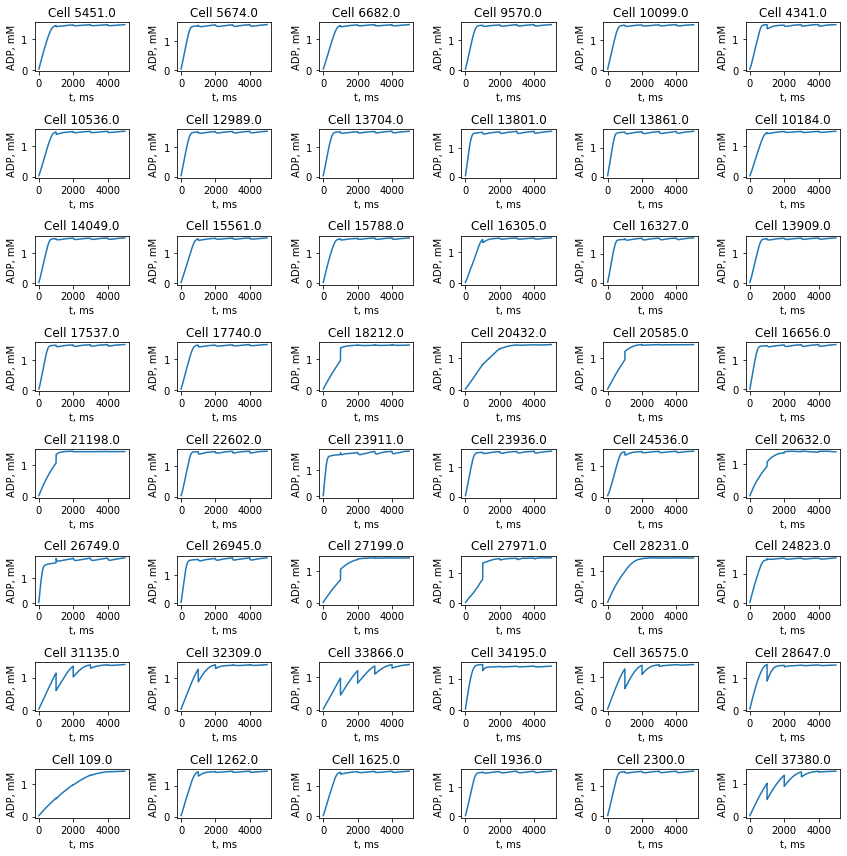

In [9]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(adp.loc[:,["time"] + onepercent_gids.tolist()[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(adp['time'],adp[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='ADP, mM')

fig.tight_layout()

#plt.savefig('/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/met_v3_all_23nov2020/plot_atp_onePercentCellsShown.png')


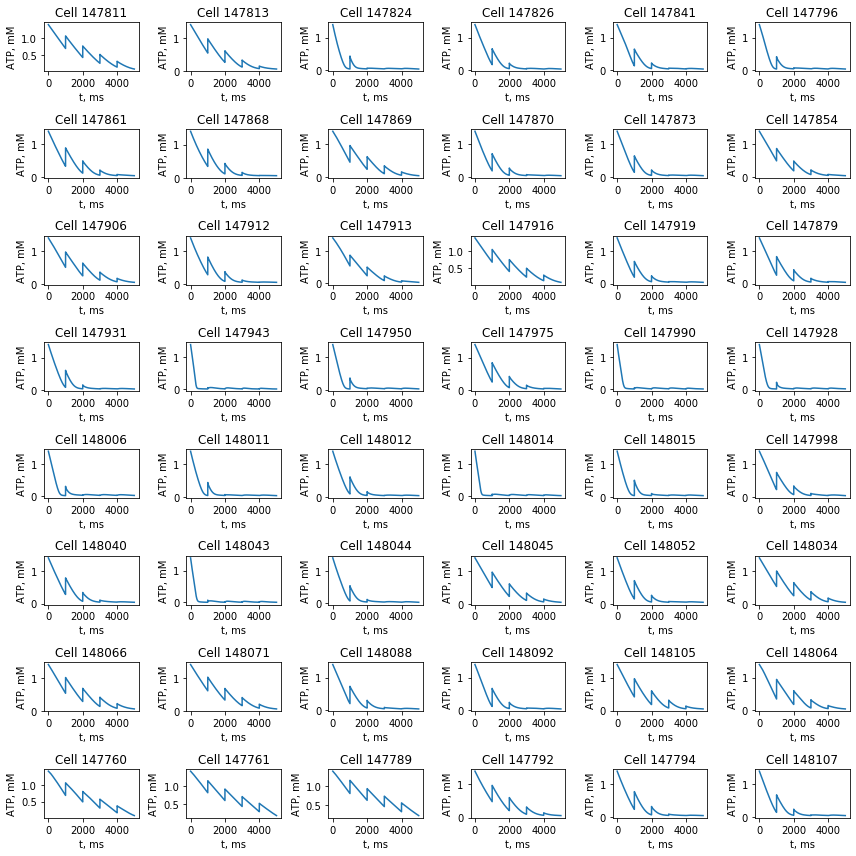

In [6]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(atp.loc[:,["time"] + L5mc2_TPC_A[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(atp['time'],atp[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='ATP, mM')

fig.tight_layout()


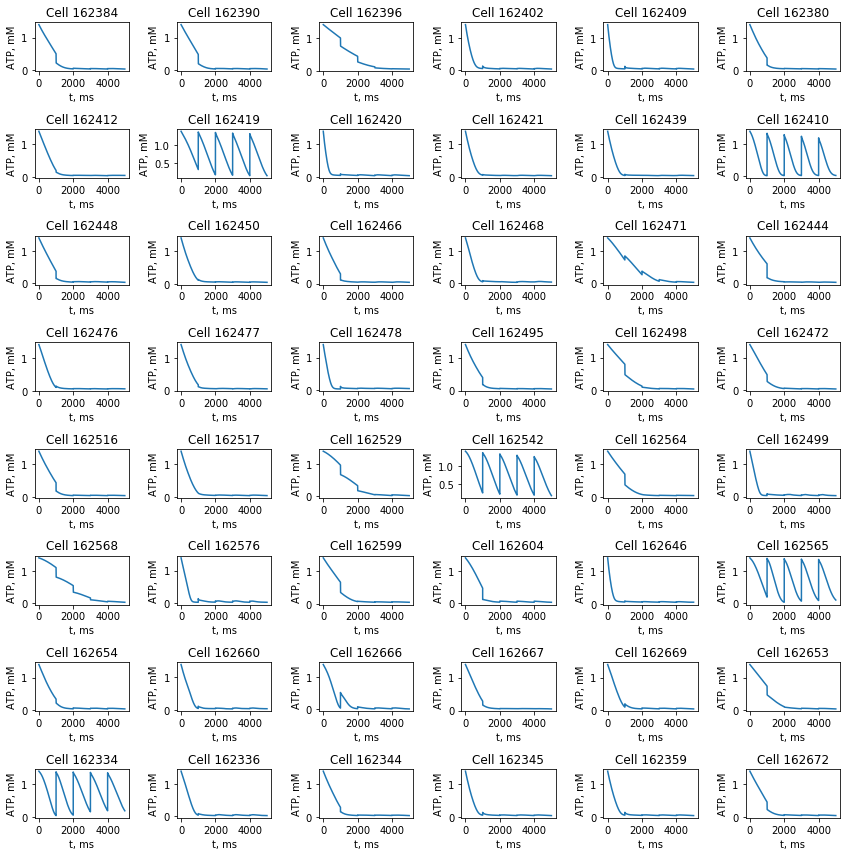

In [7]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(atp.loc[:,["time"] + L5mc2_MC[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(atp['time'],atp[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='ATP, mM')

fig.tight_layout()


In [ ]:
#A single cortical neuron utilizes approximately 4.7 billion ATPs per second in a resting human brain. Zhu 2012
# 4.7e9 molecules/sec

# Glutamate-generated electrical activity alone accounts for ∼80% of total brain ATP consumption (Attwell and Laughlin, 2001)
# https://www.cell.com/neuron/comments/S0896-6273(12)00756-8 

# single AP - 10^8-10^9 molecules ATP http://book.bionumbers.org/what-is-the-power-consumption-of-a-cell/
# 600 10^6 ATP molecules Range: 480-800 10e6 ATP molecules https://bionumbers.hms.harvard.edu/bionumber.aspx?&id=111183 Hallermann, S., de Kock, C.P.J., Stuart, G.J., and Kole, M.H.P. (2012). State and location dependence of action potential metabolic cost in cortical pyramidal neurons. Nat Neurosci. 2012 Jun 3 15(7):1007-14. doi: 10.1038/nn.3132. range given in p.1007 right column 2nd paragraph & p.1013 right column top paragraphPubMed ID22660478
# between ~480 and ~800 × 10^6 ATP molecules for average thick- and slender-tufted L5 neurons - total quantity of ATP molecules required to restore the Na+ and K+ gradient after one action potential


# 2*10^8 mol/sec SciRep2019

#to pump these out, the Na+ /K+ pump will hydrolyze approximately 67,000 ATP molecules. https://journals.sagepub.com/doi/full/10.1097/00004647-200110000-00001


In [13]:
(atp[atp['time']==100.0][2].values[0] - atp[atp['time']==0.0][2].values[0])/0.1  #mM/s

-0.777738094329834

In [14]:
((atp[atp['time']==100.0][2].values[0] - atp[atp['time']==0.0][2].values[0])/0.1)*1e-3* 6.0e+23 #molecules/sec per L

-4.666428565979004e+20

In [15]:
((atp[atp['time']==100.0][2].values[0] - atp[atp['time']==0.0][2].values[0])/0.1)*1e-3* 6.0e+23 * 2e-12 #molecules/sec per cell

-933285713.1958008

In [ ]:
#Volume = 1945 uM^3 
#Volume = 2e3 * 1e-15 L = 2e-12 L

In [ ]:
#6e23 #(molecules/mol)

In [16]:
933285713.1958008 /6e23 # mol/sec per cell

1.555476188659668e-15

In [ ]:
6e8 (molecules/sec) / 6e23 (molecules/mol)

In [ ]:
1e3*(1e8/1e23) # m mol/sec

In [ ]:
1e-12/2e-12 #L   mM/sec

In [ ]:
5.0 #mM/sec

In [ ]:
# full met no stim
sim = Simulation('/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/met_nostim/BlueConfig')


report = sim.report('NaConcAllCmps', source='h5')
nai_ns = report.get()

report = sim.report('KConcAllCmps', source='h5')
ki_ns = report.get()

report = sim.report('CaConcAllCmps', source='h5')
cai_ns = report.get()

report = sim.report('ATPConcAllCmps', source='h5')
atp_ns = report.get()

report = sim.report('ADPConcAllCmps', source='h5')
adp_ns = report.get()

atp_ns = atp_ns.reset_index()

Have keys ({'FlushBufferScalar'}) that are not defined for section: Run
Ignoring unknown key: 'FlushBufferScalar'
`brain` module not found. Using experimental fallback implementation for H5 report access.


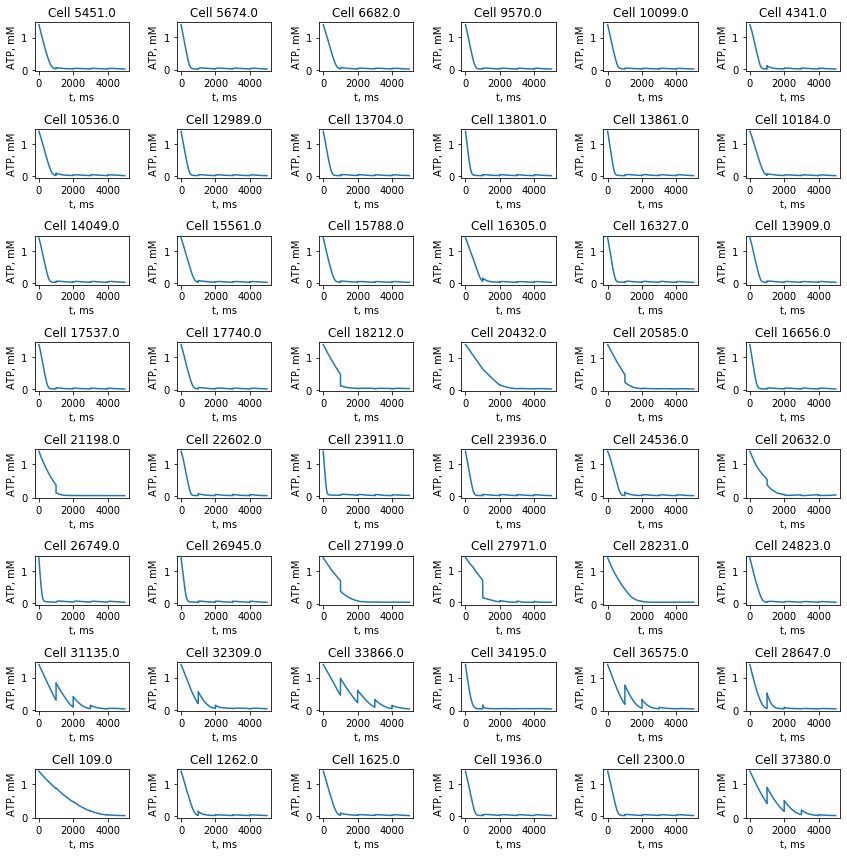

In [6]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(atp_ns.loc[:,["time"] + onepercent_gids.tolist()[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(atp_ns['time'],atp_ns[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='ATP, mM')

fig.tight_layout()

#plt.savefig('/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/met_nostim/plot_atp_onePercentCellsShown.png')


In [4]:
# gen met thalam stim
sim = Simulation('/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/met_general/BlueConfig')

report = sim.report('NaConcAllCmps', source='h5')
nai_gen = report.get()
nai_gen = nai_gen.reset_index()

report = sim.report('KConcAllCmps', source='h5')
ki_gen = report.get()
ki_gen = ki_gen.reset_index()

report = sim.report('CaConcAllCmps', source='h5')
cai_gen = report.get()
cai_gen = cai_gen.reset_index()

report = sim.report('ATPConcAllCmps', source='h5')
atp_gen = report.get()
atp_gen = atp_gen.reset_index()

report = sim.report('ADPConcAllCmps', source='h5')
adp_gen = report.get()
adp_gen = adp_gen.reset_index()

Have keys ({'FlushBufferScalar'}) that are not defined for section: Run
Ignoring unknown key: 'FlushBufferScalar'
`brain` module not found. Using experimental fallback implementation for H5 report access.
Ignoring unknown key: 'FlushBufferScalar'
`brain` module not found. Using experimental fallback implementation for H5 report access.
Ignoring unknown key: 'FlushBufferScalar'
`brain` module not found. Using experimental fallback implementation for H5 report access.
Ignoring unknown key: 'FlushBufferScalar'
`brain` module not found. Using experimental fallback implementation for H5 report access.
Ignoring unknown key: 'FlushBufferScalar'
`brain` module not found. Using experimental fallback implementation for H5 report access.


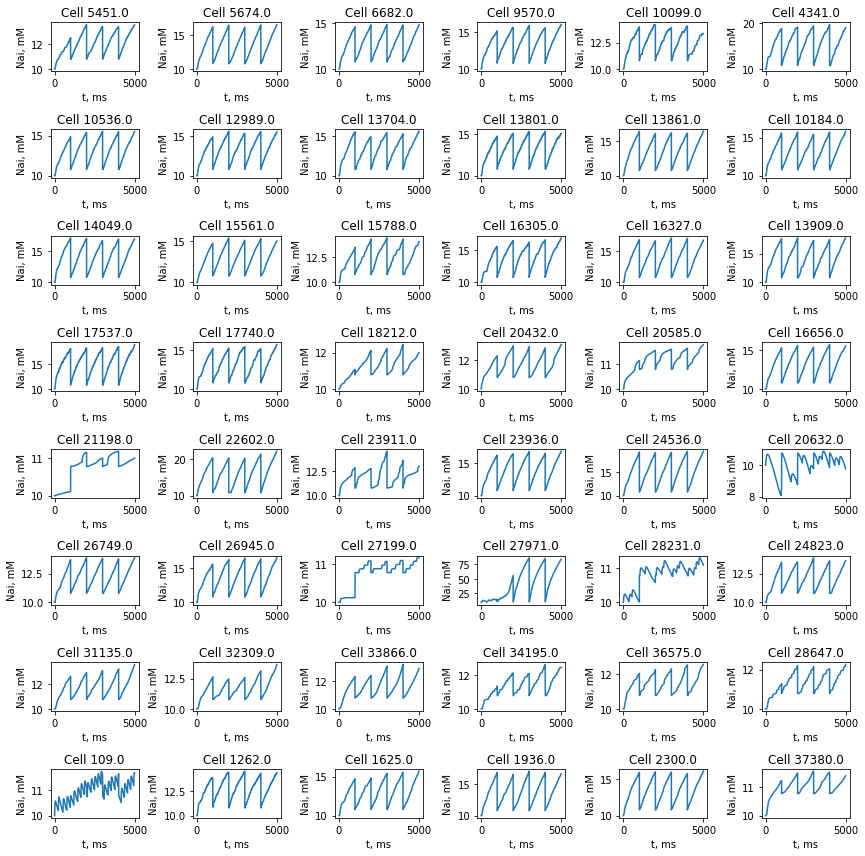

In [5]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(nai_gen.loc[:,["time"] + onepercent_gids.tolist()[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(nai_gen['time'],nai_gen[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='Nai, mM')

fig.tight_layout()


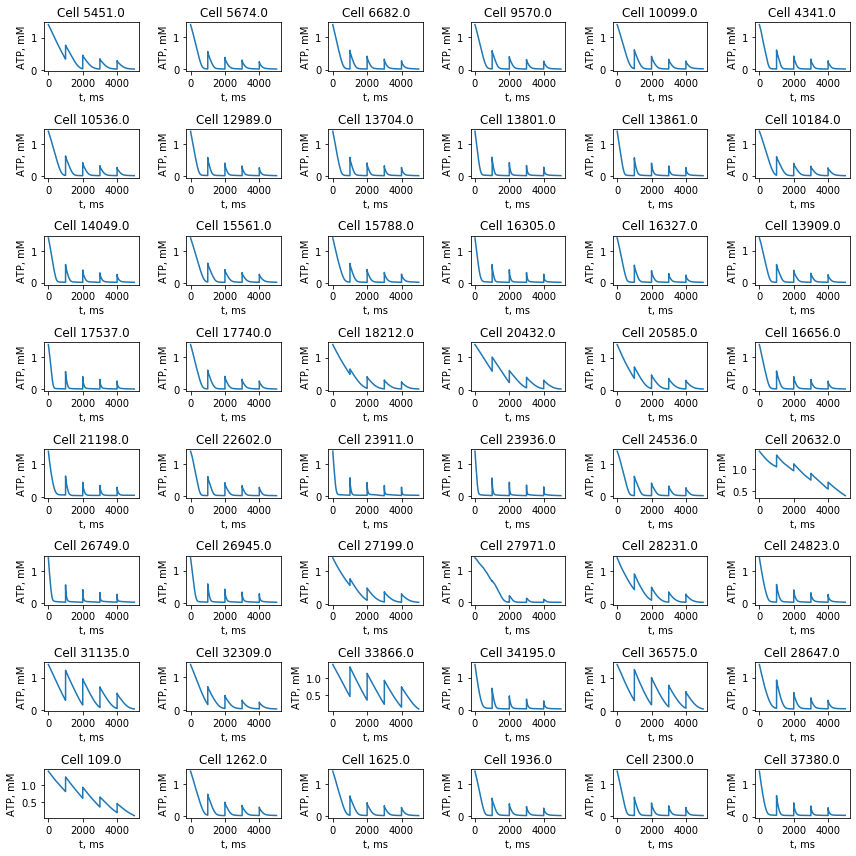

In [4]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(atp_gen.loc[:,["time"] + onepercent_gids.tolist()[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(atp_gen['time'],atp_gen[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='ATP, mM')

fig.tight_layout()

#plt.savefig('/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/met_general/plot_atp_onePercentCellsShown.png')


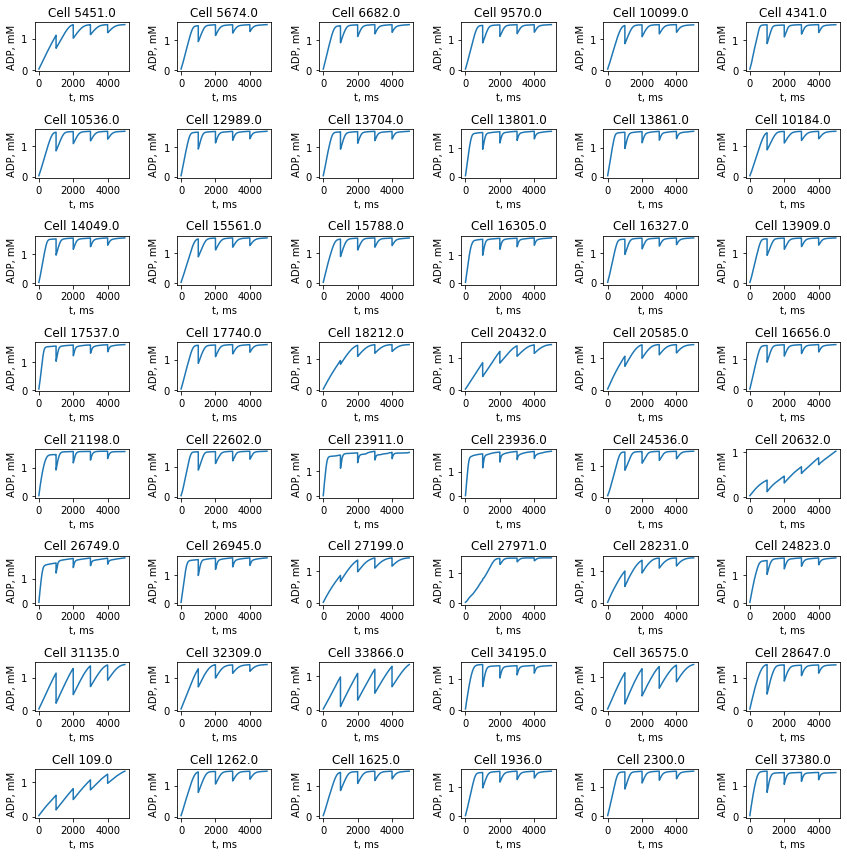

In [4]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(adp_gen.loc[:,["time"] + onepercent_gids.tolist()[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(adp_gen['time'],adp_gen[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='ADP, mM')

fig.tight_layout()


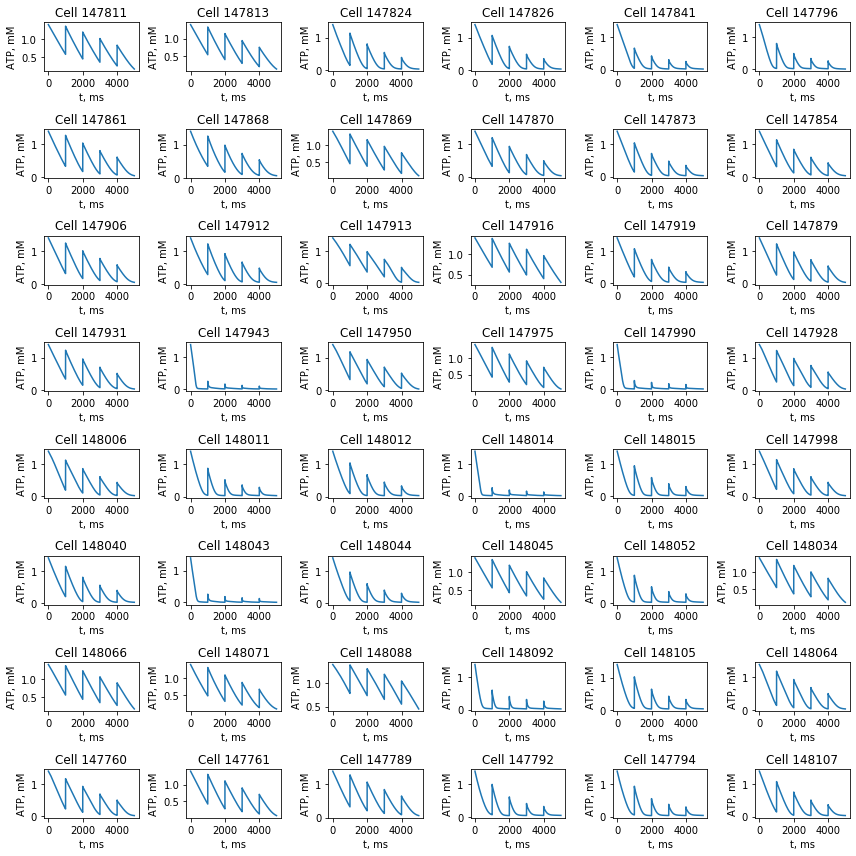

In [8]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(atp_gen.loc[:,["time"] + L5mc2_TPC_A[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(atp_gen['time'],atp_gen[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='ATP, mM')

fig.tight_layout()


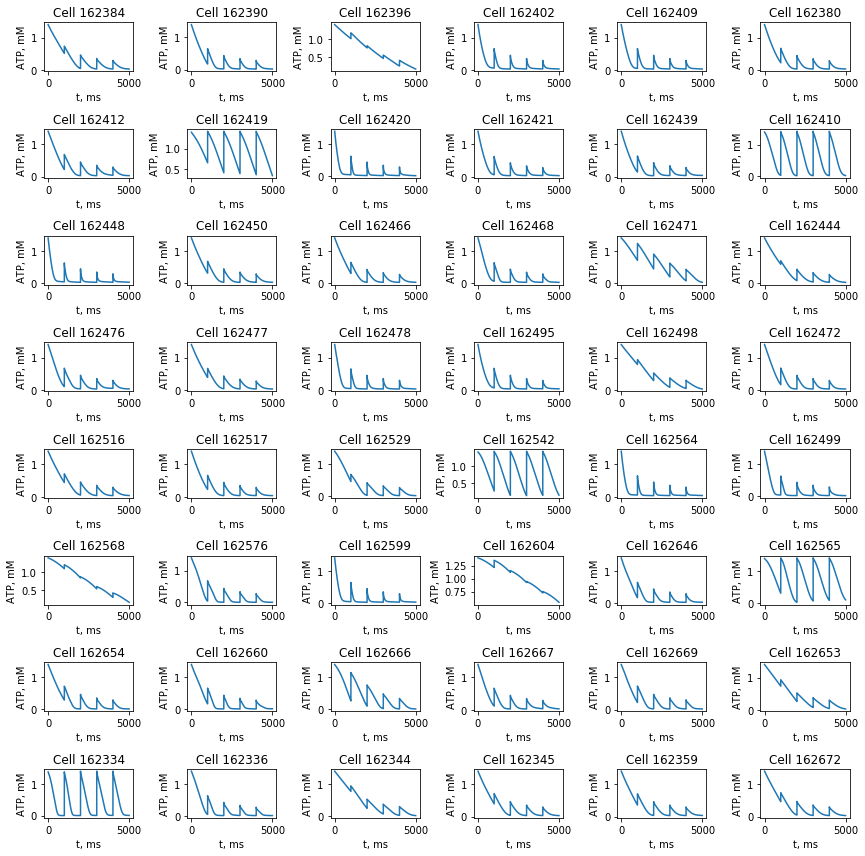

In [7]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(atp_gen.loc[:,["time"] + L5mc2_MC[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(atp_gen['time'],atp_gen[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='ATP, mM')

fig.tight_layout()


In [3]:
# no met thalam stim
sim = Simulation('/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/nomet_18nov2020/BlueConfig')

report = sim.report('NaConcAllCmps', source='h5')
nai_nm = report.get()
nai_nm = nai_nm.reset_index()

report = sim.report('KConcAllCmps', source='h5')
ki_nm = report.get()
ki_nm = ki_nm.reset_index()

report = sim.report('CaConcAllCmps', source='h5')
cai_nm = report.get()
cai_nm = cai_nm.reset_index()

report = sim.report('ATPConcAllCmps', source='h5')
atp_nm = report.get()
atp_nm = atp_nm.reset_index()

report = sim.report('ADPConcAllCmps', source='h5')
adp_nm = report.get()
adp_nm = adp_nm.reset_index()

Have keys ({'FlushBufferScalar'}) that are not defined for section: Run
Ignoring unknown key: 'FlushBufferScalar'
`brain` module not found. Using experimental fallback implementation for H5 report access.
Ignoring unknown key: 'FlushBufferScalar'
`brain` module not found. Using experimental fallback implementation for H5 report access.
Ignoring unknown key: 'FlushBufferScalar'
`brain` module not found. Using experimental fallback implementation for H5 report access.
Ignoring unknown key: 'FlushBufferScalar'
`brain` module not found. Using experimental fallback implementation for H5 report access.
Ignoring unknown key: 'FlushBufferScalar'
`brain` module not found. Using experimental fallback implementation for H5 report access.


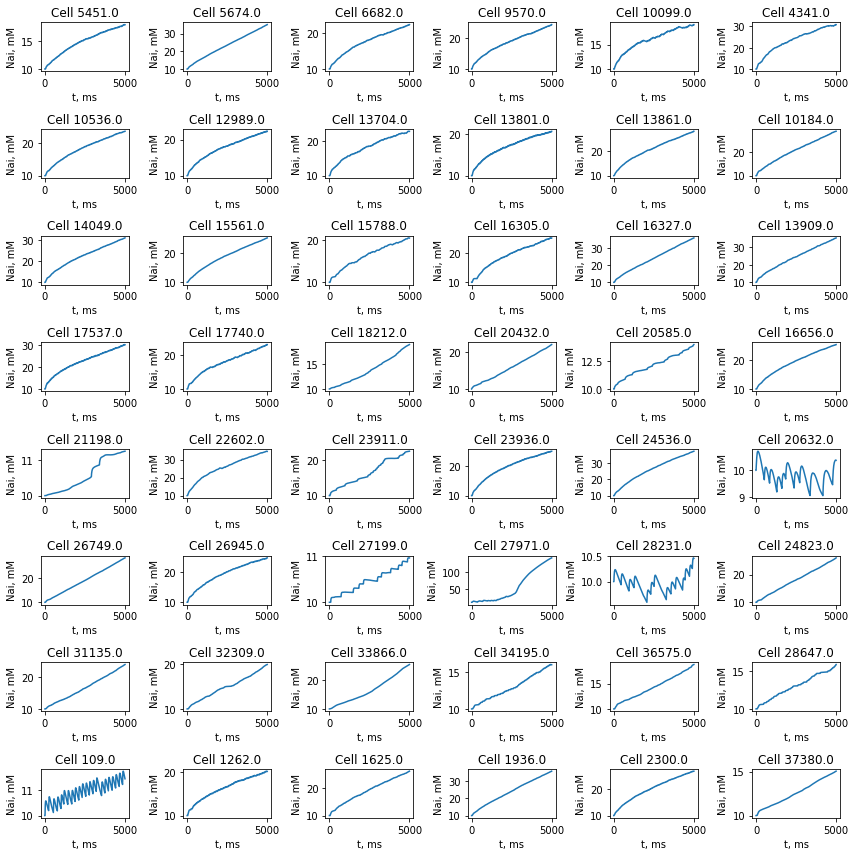

In [6]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(nai_nm.loc[:,["time"] + onepercent_gids.tolist()[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(nai_nm['time'],nai_nm[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='Nai, mM')

fig.tight_layout()


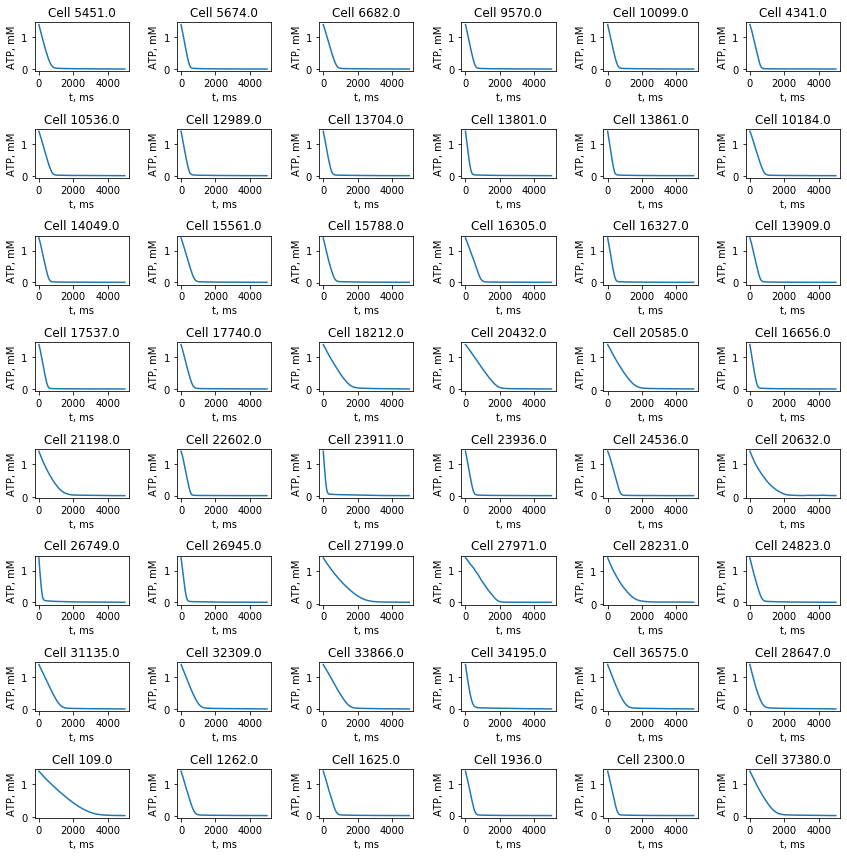

In [4]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(atp_nm.loc[:,["time"] + onepercent_gids.tolist()[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(atp_nm['time'],atp_nm[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='ATP, mM')

fig.tight_layout()


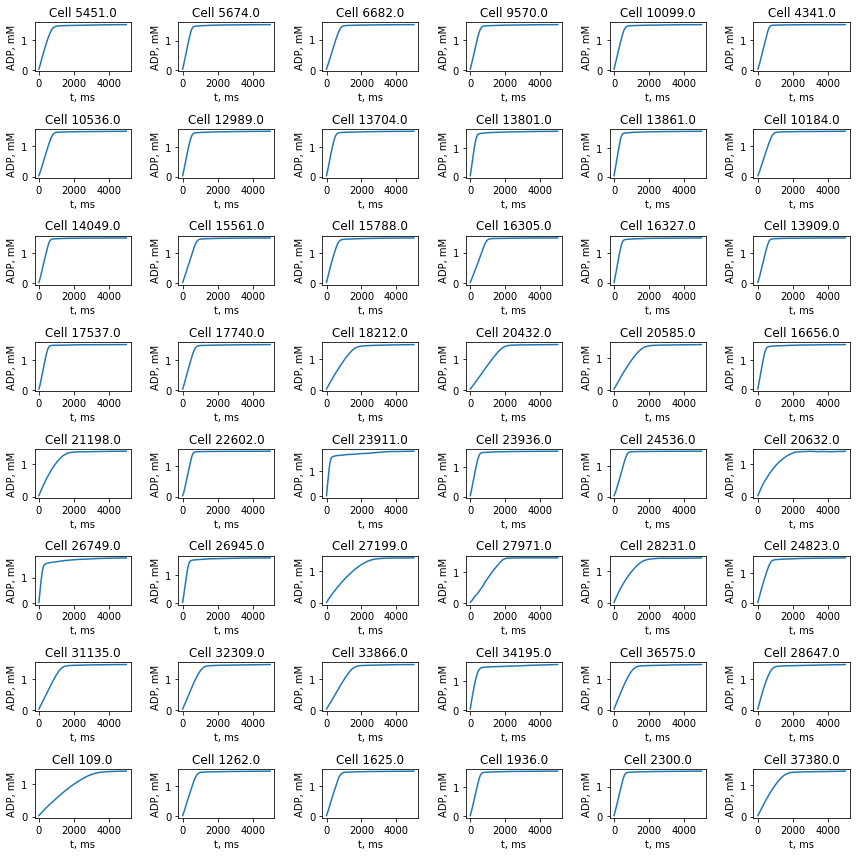

In [5]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(adp_nm.loc[:,["time"] + onepercent_gids.tolist()[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(adp_nm['time'],adp_nm[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='ADP, mM')

fig.tight_layout()
